https://drive.google.com/file/d/19cZt9luXSjbJg2JEDA_toZP2lbT8Yv3n/view?usp=sharing


# Initialization


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)




#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Working with DATASET

In [ ]:
# file_link = 'https://drive.google.com/file/d/19cZt9luXSjbJg2JEDA_toZP2lbT8Yv3n/view?usp=sharing'
# id = file_link.split("/")[-2]
# new_link = f'https://drive.google.com/uc?id={id}'
# df = pd.read_csv(new_link)
# df = pd.read_csv("/content/drive/MyDrive/CSE427/email.csv")  # Tafsir

# df = pd.read_csv("/content/drive/MyDrive/CSE427/email.csv")   # sujit

df = pd.read_csv("/content/drive/MyDrive/FALL_2025/427/427_Project_/email.csv")  #anto


df.head(5)

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [ ]:
df.shape

(2629979, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629979 entries, 0 to 2629978
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   date         object
 2   user         object
 3   pc           object
 4   to           object
 5   cc           object
 6   bcc          object
 7   from         object
 8   size         int64 
 9   attachments  int64 
 10  content      object
dtypes: int64(2), object(9)
memory usage: 220.7+ MB


In [ ]:
df.describe(include='all')

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
count,2629979,2629979,2629979,2629979,2629979,1012925,417002,2629979,2.629979e+06,2.629979e+06,2629979
unique,2629979,2384107,1000,1000,659170,150741,614,2678,NaN,NaN,2629964
top,{O8D9-S1AR98KA-2325CRWF},02/16/2010 15:28:59,MSS0001,PC-3952,Halla.Cathleen.Simmons@dtaa.com,Winter.Veda.Burks@dtaa.com,Winter.Veda.Burks@dtaa.com,Mona.Susan.Shannon@dtaa.com,NaN,NaN,prince prince prince prince prince prince prin...
freq,1,18,12034,12034,3064,4342,5037,6317,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.999232e+04,4.035960e-01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.993642e+03,1.049910e+00,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.182000e+03,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.285900e+04,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.845500e+04,0.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.541800e+04,0.000000e+00,NaN


In [ ]:
df.nunique()

,0
id,2629979
date,2384107
user,1000
pc,1000
to,659170
cc,150741
bcc,614
from,2678
size,65123
attachments,10


In [ ]:
df.isnull().sum()

,0
id,0
date,0
user,0
pc,0
to,0
cc,1617054
bcc,2212977
from,0
size,0
attachments,0


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'content']
Numerical Variables:
['size', 'attachments']


<Figure size 800x600 with 0 Axes>

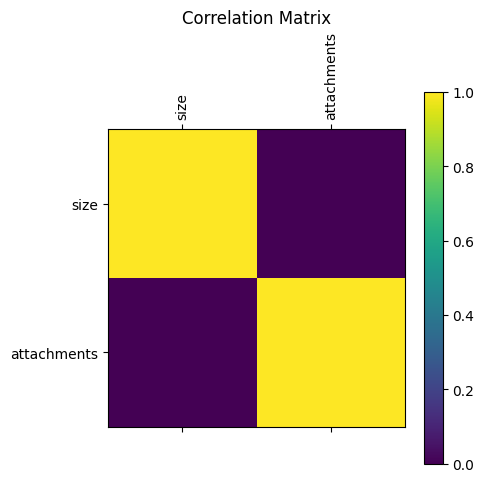

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

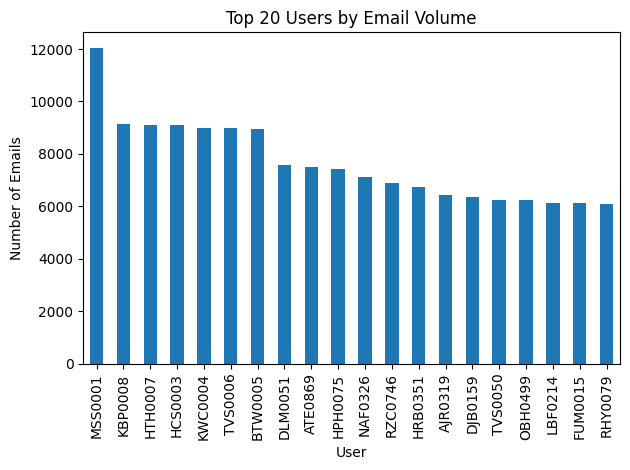

In [ ]:
emails_per_user = df['user'].value_counts().head(20)

plt.figure()
emails_per_user.plot(kind='bar')
plt.title("Top 20 Users by Email Volume")
plt.xlabel("User")
plt.ylabel("Number of Emails")
plt.tight_layout()
plt.show()


In [ ]:
df['date_clean'] = df['date'].astype(str).str.replace('\n', ' ', regex=False)
df['datetime'] = pd.to_datetime(df['date_clean'], errors='coerce')

df['date_only']   = df['datetime'].dt.date
df['hour']        = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month']       = df['datetime'].dt.to_period('M').astype(str)

df[['date', 'date_clean', 'datetime', 'hour', 'day_of_week']].head()


,date,date_clean,datetime,hour,day_of_week
0,01/02/2010 07:11:45,01/02/2010 07:11:45,2010-01-02 07:11:45,7,Saturday
1,01/02/2010 07:12:16,01/02/2010 07:12:16,2010-01-02 07:12:16,7,Saturday
2,01/02/2010 07:13:00,01/02/2010 07:13:00,2010-01-02 07:13:00,7,Saturday
3,01/02/2010 07:13:17,01/02/2010 07:13:17,2010-01-02 07:13:17,7,Saturday
4,01/02/2010 07:13:28,01/02/2010 07:13:28,2010-01-02 07:13:28,7,Saturday


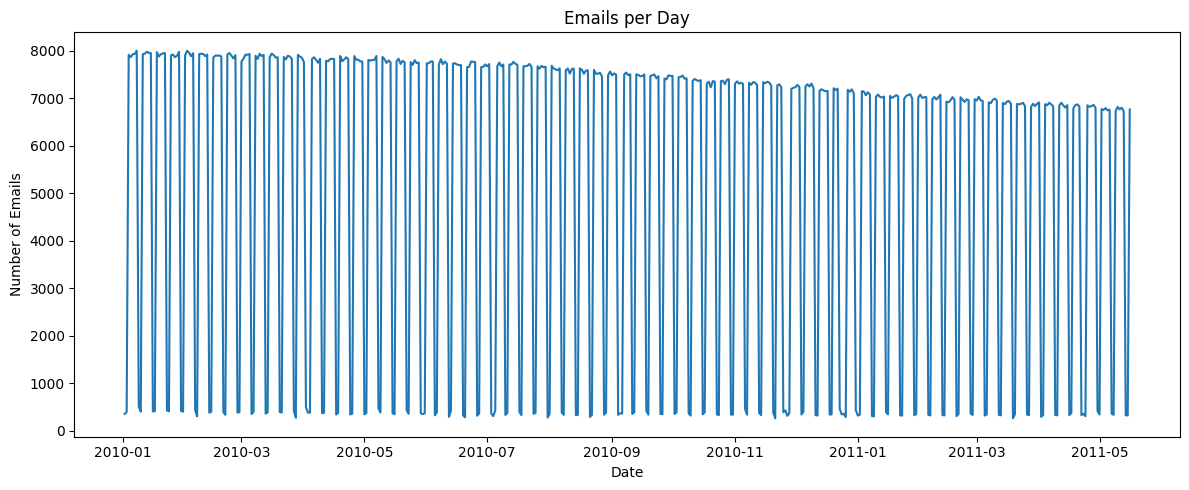

In [ ]:
emails_per_day = df.groupby('date_only')['id'].count()

plt.figure(figsize=(12,5))
emails_per_day.plot()
plt.title('Emails per Day')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.tight_layout()
plt.show()


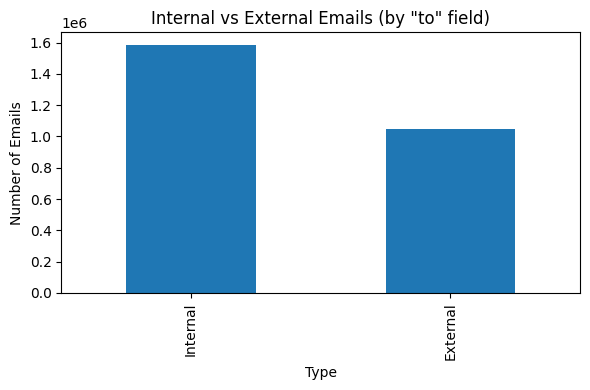

In [ ]:
org_domain = '@dtaa.com'

df['is_external'] = ~df['to'].fillna('').str.contains(org_domain)

external_counts = df['is_external'].map({False: 'Internal', True: 'External'}).value_counts()

plt.figure(figsize=(6,4))
external_counts.plot(kind='bar')
plt.title('Internal vs External Emails (by "to" field)')
plt.xlabel('Type')
plt.ylabel('Number of Emails')
plt.tight_layout()
plt.show()


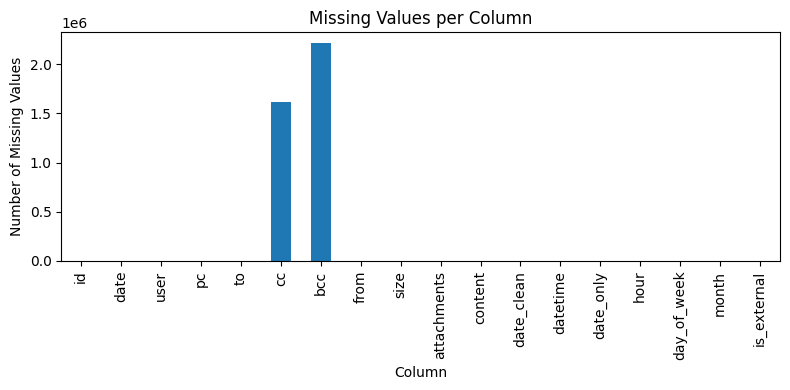

In [ ]:
null_counts = df.isnull().sum()

plt.figure(figsize=(8,4))
null_counts.plot(kind='bar')
plt.title('Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [ ]:
print("\n1. Dataset Shape:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")


1. Dataset Shape:
   Rows: 2,629,979
   Columns: 18


In [ ]:
print("\n2. Column Names and Types:")
print(df.dtypes)


2. Column Names and Types:
id                     object
date                   object
user                   object
pc                     object
to                     object
cc                     object
bcc                    object
from                   object
size                    int64
attachments             int64
content                object
date_clean             object
datetime       datetime64[ns]
date_only              object
hour                    int32
day_of_week            object
month                  object
is_external              bool
dtype: object


In [ ]:
print("\n3. First 5 rows:")
print(df.head())


3. First 5 rows:
                         id                 date     user       pc  \
0  {R3I7-S4TX96FG-8219JWFF}  01/02/2010 07:11:45  LAP0338  PC-5758   
1  {R0R9-E4GL59IK-2907OSWJ}  01/02/2010 07:12:16  MOH0273  PC-6699   
2  {G2B2-A8XY58CP-2847ZJZL}  01/02/2010 07:13:00  LAP0338  PC-5758   
3  {A3A9-F4TH89AA-8318GFGK}  01/02/2010 07:13:17  LAP0338  PC-5758   
4  {E8B7-C8FZ88UF-2946RUQQ}  01/02/2010 07:13:28  MOH0273  PC-6699   

                                                  to  \
0  Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...   
1                        Odonnell-Gage@bellsouth.net   
2                         Penelope_Colon@netzero.com   
3                          Judith_Hayden@comcast.net   
4  Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...   

                                cc                          bcc  \
0  Nathaniel.Hunter.Heath@dtaa.com                          NaN   
1                              NaN                          NaN   
2                      

In [ ]:
print("\n4. Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\n   Total missing values: {df.isnull().sum().sum():,}")


4. Missing Values:
cc     1617054
bcc    2212977
dtype: int64

   Total missing values: 3,830,031


In [ ]:
print("\n5. Unique Values per Column:")
print(df.nunique())


5. Unique Values per Column:
id             2629979
date           2384107
user              1000
pc                1000
to              659170
cc              150741
bcc                614
from              2678
size             65123
attachments         10
content        2629964
date_clean     2384107
datetime       2384107
date_only          500
hour                18
day_of_week          7
month               17
is_external          2
dtype: int64


In [ ]:
print("\n6. Statistical Summary (Numerical Columns):")
print(df.describe())


6. Statistical Summary (Numerical Columns):
               size   attachments                       datetime          hour
count  2.629979e+06  2.629979e+06                        2629979  2.629979e+06
mean   2.999232e+04  4.035960e-01  2010-08-31 21:49:49.764926464  1.220832e+01
min    6.182000e+03  0.000000e+00            2010-01-02 07:11:45  6.000000e+00
25%    2.285900e+04  0.000000e+00     2010-04-28 14:48:28.500000  1.000000e+01
50%    2.845500e+04  0.000000e+00            2010-08-26 12:13:24  1.200000e+01
75%    3.541800e+04  0.000000e+00            2011-01-04 16:17:05  1.500000e+01
max    1.419090e+05  9.000000e+00            2011-05-16 21:16:26  2.300000e+01
std    9.993642e+03  1.049910e+00                            NaN  3.042751e+00


# **HANDLING MISSING VALUES**

In [ ]:
print("1. Missing Values Analysis:")
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_df)

1. Missing Values Analysis:
  Column  Missing_Count  Missing_Percentage
6    bcc        2212977           84.144284
5     cc        1617054           61.485434


In [ ]:
print("2. Handling Strategy:")
print("   - 'cc' column: 1,617,054 missing (61.5%) - Fill with 'None'")
print("   - 'bcc' column: 2,212,977 missing (84.1%) - Fill with 'None'")

2. Handling Strategy:
   - 'cc' column: 1,617,054 missing (61.5%) - Fill with 'None'
   - 'bcc' column: 2,212,977 missing (84.1%) - Fill with 'None'


In [ ]:
df_processed = df.copy()

df_processed['cc'] = df_processed['cc'].fillna('None')
df_processed['bcc'] = df_processed['bcc'].fillna('None')

print("3. After Handling Missing Values:")
print(f"   Total missing values: {df_processed.isnull().sum().sum()}")

3. After Handling Missing Values:
   Total missing values: 0


In [ ]:
print("4. Verification:")
print(df_processed.isnull().sum())

4. Verification:
id             0
date           0
user           0
pc             0
to             0
cc             0
bcc            0
from           0
size           0
attachments    0
content        0
date_clean     0
datetime       0
date_only      0
hour           0
day_of_week    0
month          0
is_external    0
dtype: int64


# **FEATURE ENGINEERING**

In [ ]:
df['user'].nunique()


1000

In [ ]:

df_processed['date'] = pd.to_datetime(
    df_processed['date'], format='%m/%d/%Y %H:%M:%S'
)

df_processed['hour'] = df_processed['date'].dt.hour
df_processed['day_of_week'] = df_processed['date'].dt.dayofweek
df_processed['is_weekend'] = df_processed['day_of_week'].isin([5, 6]).astype(int)

In [ ]:
df_processed['after_hours'] = df_processed['hour'].apply(
    lambda x: 1 if x < 8 or x > 18 else 0
)


df_processed['num_recipients_to'] = df_processed['to'].str.count(';') + 1

df_processed['num_recipients_cc'] = df_processed['cc'].apply(
    lambda x: 0 if x == 'None' else x.count(';') + 1
)

df_processed['num_recipients_bcc'] = df_processed['bcc'].apply(
    lambda x: 0 if x == 'None' else x.count(';') + 1
)

df_processed['total_recipients'] = (
    df_processed['num_recipients_to'] +
    df_processed['num_recipients_cc'] +
    df_processed['num_recipients_bcc']
)

In [ ]:
df_processed['is_internal'] = df_processed['to'].str.contains(
    '@dtaa.com', na=False
).astype(int)



df_processed['content_length'] = (
    df_processed['content'].fillna('').str.split().str.len()
)

df_processed['has_attachment'] = (df_processed['attachments'] > 0).astype(int)

In [ ]:

user_features = df_processed.groupby('user').agg({
    'total_recipients': 'mean',
    'is_internal': 'mean',
    'content_length': 'mean',
    'has_attachment': 'mean',
    'attachments': 'sum',
    'after_hours': 'sum',
    'is_weekend': 'sum',
    'hour': ['mean', 'std']
})

user_features.columns = [
    'avg_recipients',
    'internal_email_ratio',
    'avg_content_length',
    'attachment_ratio',
    'total_attachments',
    'after_hours_count',
    'weekend_activity_count',
    'avg_active_hour',
    'hour_std'
]


In [ ]:


user_features['after_hours_ratio'] = (
    user_features['after_hours_count'] /
    (user_features['after_hours_count'] + user_features['weekend_activity_count'] + 1)
)

user_features['attachment_intensity'] = (
    user_features['total_attachments'] /
    (user_features['avg_recipients'] + 1)
)

user_features = user_features.fillna(0)

In [ ]:
print(f"Total users: {user_features.shape[0]}")
print(f"Total behavioral features: {user_features.shape[1]}")
print("\nFeature list:")
print(list(user_features.columns))

print("\nSample of engineered user-level features:")
display(user_features.head())

print("\nSummary of engineered user-level features:")
display(user_features.describe())

Total users: 1000
Total behavioral features: 11

Feature list:
['avg_recipients', 'internal_email_ratio', 'avg_content_length', 'attachment_ratio', 'total_attachments', 'after_hours_count', 'weekend_activity_count', 'avg_active_hour', 'hour_std', 'after_hours_ratio', 'attachment_intensity']

Sample of engineered user-level features:


,avg_recipients,internal_email_ratio,avg_content_length,attachment_ratio,total_attachments,after_hours_count,weekend_activity_count,avg_active_hour,hour_std,after_hours_ratio,attachment_intensity
user,,,,,,,,,,,
AAE0190,1.976226,0.606453,49.484610,0.202293,1780,0,0,12.623435,3.147539,0.000000,598.072891
AAF0535,3.014583,0.693750,49.593750,0.389583,364,0,0,12.368750,2.405514,0.000000,90.669434
AAF0791,2.004316,0.453851,49.816733,0.000000,0,0,0,12.272244,2.894397,0.000000,0.000000
AAL0706,2.038690,0.544643,48.818452,0.211310,145,17,0,11.714286,2.762527,0.944444,47.717924
AAM0658,1.972686,0.597876,49.535660,0.417299,613,146,0,14.792109,3.707078,0.993197,206.210822



Summary of engineered user-level features:


,avg_recipients,internal_email_ratio,avg_content_length,attachment_ratio,total_attachments,after_hours_count,weekend_activity_count,avg_active_hour,hour_std,after_hours_ratio,attachment_intensity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.291725,0.602103,49.516524,0.210181,1061.449000,115.572000,50.465000,12.387083,2.949118,0.641362,315.968327
std,0.514716,0.076046,0.325219,0.142737,1116.430763,167.378931,209.717935,0.896679,0.339091,0.450770,327.710350
min,1.801772,0.396714,47.761905,0.000000,0.000000,0.000000,0.000000,10.674959,2.191897,0.000000,0.000000
25%,1.977783,0.550442,49.358043,0.100279,126.500000,0.000000,0.000000,11.786893,2.725542,0.000000,38.262599
50%,1.998257,0.599280,49.510741,0.205818,711.000000,42.000000,0.000000,12.273290,2.865984,0.970588,223.043932
75%,2.919203,0.649722,49.667438,0.310601,1790.000000,187.000000,0.000000,13.004108,3.153606,0.993527,500.702338
max,3.968661,0.815000,50.979228,0.500000,7372.000000,1338.000000,2092.000000,15.294235,3.985080,0.999253,2002.825346


In [ ]:
X = user_features.values


# **ENCODING CATEGORICAL VARIABLES**

In [ ]:



unique_pc_count = (
    df_processed.groupby('user')['pc']
    .nunique()
    .rename('unique_pc_count')
)

print(f"Unique PC count feature created for {unique_pc_count.shape[0]} users")



user_features = user_features.join(unique_pc_count)

user_features = user_features.fillna(0)


X = user_features.values

print(f"Shape of X (users × features): {X.shape}")

print("\nList of behavioral features used:")
for col in user_features.columns:
    print(" -", col)



print("Number of missing values:", user_features.isna().any().any())
print("Number of users:", user_features.shape[0])
print("Number of features:", user_features.shape[1])

print("Sample of final user-level feature matrix:")
display(user_features.head())



Unique PC count feature created for 1000 users
Shape of X (users × features): (1000, 12)

List of behavioral features used:
 - avg_recipients
 - internal_email_ratio
 - avg_content_length
 - attachment_ratio
 - total_attachments
 - after_hours_count
 - weekend_activity_count
 - avg_active_hour
 - hour_std
 - after_hours_ratio
 - attachment_intensity
 - unique_pc_count
Number of missing values: False
Number of users: 1000
Number of features: 12
Sample of final user-level feature matrix:


,avg_recipients,internal_email_ratio,avg_content_length,attachment_ratio,total_attachments,after_hours_count,weekend_activity_count,avg_active_hour,hour_std,after_hours_ratio,attachment_intensity,unique_pc_count
user,,,,,,,,,,,,
AAE0190,1.976226,0.606453,49.484610,0.202293,1780,0,0,12.623435,3.147539,0.000000,598.072891,1
AAF0535,3.014583,0.693750,49.593750,0.389583,364,0,0,12.368750,2.405514,0.000000,90.669434,1
AAF0791,2.004316,0.453851,49.816733,0.000000,0,0,0,12.272244,2.894397,0.000000,0.000000,1
AAL0706,2.038690,0.544643,48.818452,0.211310,145,17,0,11.714286,2.762527,0.944444,47.717924,1
AAM0658,1.972686,0.597876,49.535660,0.417299,613,146,0,14.792109,3.707078,0.993197,206.210822,1


# **PCA clustering**

Reduced dimensions: 10


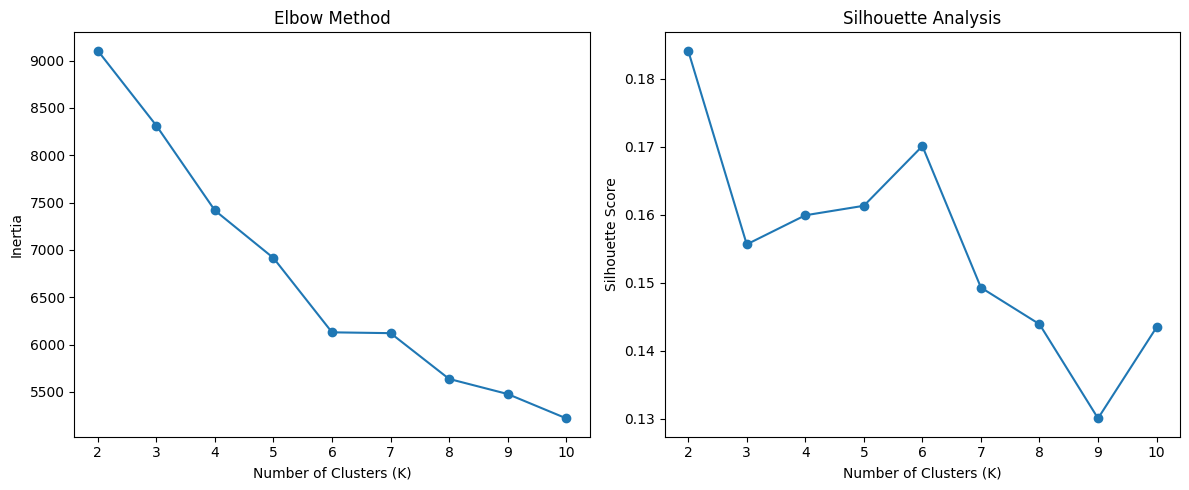


Final clustering completed with K = 2
Cluster distribution:
Cluster
0    607
1    393
Name: count, dtype: int64

Suspicious cluster identified as: 1

Threat label distribution:
Threat_Label
Normal        607
Suspicious    393
Name: count, dtype: int64


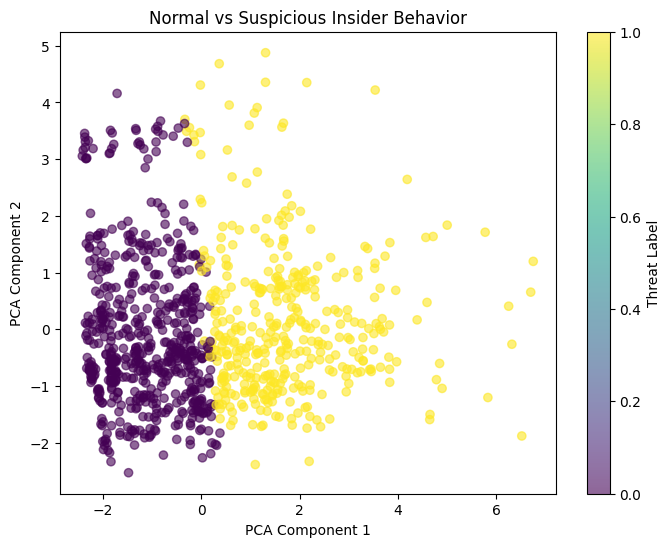

PART 4 COMPLETED: Insider threat detection via clustering


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np



X = user_features.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced dimensions: {X_pca.shape[1]}")

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = MiniBatchKMeans(
        n_clusters=k,
        random_state=42,
        batch_size=1024,
        n_init=10
    )

    labels = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)

    sil_score = silhouette_score(
        X_pca,
        labels,
        sample_size=min(5000, X_pca.shape[0]),
        random_state=42
    )
    silhouette_scores.append(sil_score)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.tight_layout()
plt.show()

optimal_k = 2

final_kmeans = MiniBatchKMeans(
    n_clusters=optimal_k,
    random_state=42,
    batch_size=1024,
    n_init=10
)

user_features['Cluster'] = final_kmeans.fit_predict(X_pca)

print(f"\nFinal clustering completed with K = {optimal_k}")
print("Cluster distribution:")
print(user_features['Cluster'].value_counts().sort_index())

suspicious_cluster = user_features['Cluster'].value_counts().idxmin()

user_features['Threat_Label'] = user_features['Cluster'].apply(
    lambda x: 'Suspicious' if x == suspicious_cluster else 'Normal'
)

print("\nSuspicious cluster identified as:", suspicious_cluster)
print("\nThreat label distribution:")
print(user_features['Threat_Label'].value_counts())

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=user_features['Threat_Label'].map({'Normal': 0, 'Suspicious': 1}),
    alpha=0.6
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Normal vs Suspicious Insider Behavior")
plt.colorbar(label="Threat Label")
plt.show()

print("=" * 80)
print("PART 4 COMPLETED: Insider threat detection via clustering")
print("=" * 80)


In [ ]:
final_output = user_features[['Cluster', 'Threat_Label']]
final_output.head(10)


,Cluster,Threat_Label
user,,
AAE0190,1,Suspicious
AAF0535,0,Normal
AAF0791,0,Normal
AAL0706,0,Normal
AAM0658,0,Normal
AAN0823,0,Normal
AAS0442,0,Normal
AAV0450,0,Normal
AAW0353,0,Normal


In [ ]:
final_output.to_csv("insider_threat_results.csv")


In [ ]:
user_features['Threat_Label'].value_counts()


,count
Threat_Label,
Normal,607
Suspicious,393


In [ ]:
cluster_behavior = user_features.groupby('Threat_Label').mean()
cluster_behavior


,avg_recipients,internal_email_ratio,avg_content_length,attachment_ratio,total_attachments,after_hours_count,weekend_activity_count,avg_active_hour,hour_std,after_hours_ratio,attachment_intensity,unique_pc_count,Cluster
Threat_Label,,,,,,,,,,,,,
Normal,2.135694,0.601565,49.528344,0.142745,358.158155,66.528830,13.543657,12.532915,2.961568,0.597573,115.997870,1.0,0.0
Suspicious,2.532720,0.602934,49.498267,0.314337,2147.702290,191.320611,107.491094,12.161842,2.929890,0.708994,624.828549,1.0,1.0


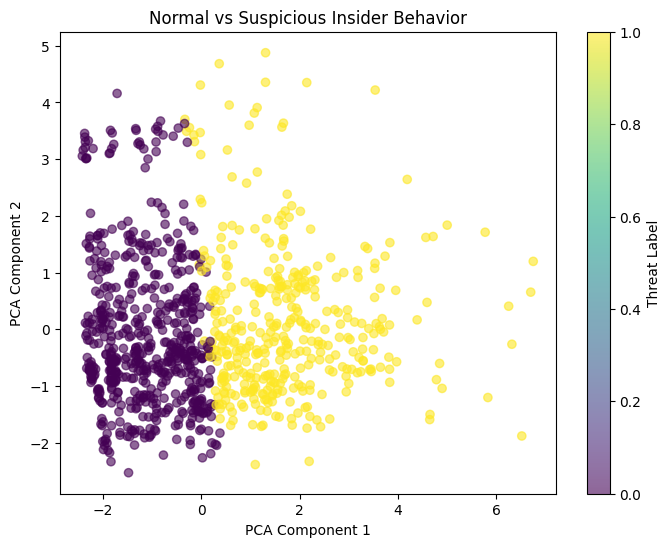

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=user_features['Threat_Label'].map({'Normal':0, 'Suspicious':1}),
    alpha=0.6
)
plt.title("Normal vs Suspicious Insider Behavior")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Threat Label")
plt.show()


In [ ]:
from numpy.linalg import norm

centers = final_kmeans.cluster_centers_

user_features['Anomaly_Score'] = [
    norm(X_pca[i] - centers[label])
    for i, label in enumerate(user_features['Cluster'])
]


In [ ]:
user_features.groupby('Threat_Label')['Anomaly_Score'].mean()


,Anomaly_Score
Threat_Label,
Normal,2.657355
Suspicious,3.127138


# K-means clustering

Numeric feature matrix shape: (1000, 13)


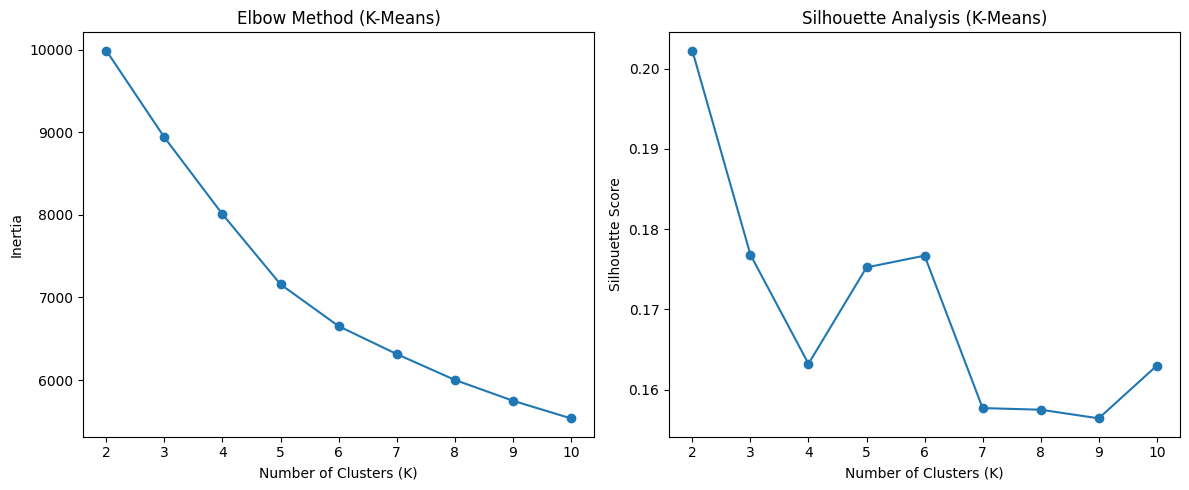


Cluster distribution:
Cluster
0    685
1    315
Name: count, dtype: int64

Threat label distribution:
Threat_Label
Normal        685
Suspicious    315
Name: count, dtype: int64


In [ ]:


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = user_features.select_dtypes(include=['int64', 'float64'])

print(f"Numeric feature matrix shape: {X.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    inertia.append(kmeans.inertia_)

    sil_score = silhouette_score(
        X_scaled,
        labels,
        sample_size=min(5000, X_scaled.shape[0]),
        random_state=42
    )
    silhouette_scores.append(sil_score)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method (K-Means)")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (K-Means)")

plt.tight_layout()
plt.show()

optimal_k = 2

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
user_features['Cluster'] = final_kmeans.fit_predict(X_scaled)

print("\nCluster distribution:")
print(user_features['Cluster'].value_counts().sort_index())

suspicious_cluster = user_features['Cluster'].value_counts().idxmin()

user_features['Threat_Label'] = user_features['Cluster'].apply(
    lambda x: 'Suspicious' if x == suspicious_cluster else 'Normal'
)

print("\nThreat label distribution:")
print(user_features['Threat_Label'].value_counts())



In [ ]:
user_features[['Cluster', 'Threat_Label']].head()


,Cluster,Threat_Label
user,,
AAE0190,0,Normal
AAF0535,0,Normal
AAF0791,0,Normal
AAL0706,0,Normal
AAM0658,0,Normal


In [ ]:
suspicious_cluster = user_features['Cluster'].value_counts().idxmin()


In [ ]:
user_features['target'] = user_features['Cluster'].apply(
    lambda x: 1 if x == suspicious_cluster else 0
)


In [ ]:
user_features['target'].value_counts()


,count
target,
0,685
1,315


In [ ]:
user_features[['Cluster', 'target']].head(10)


,Cluster,target
user,,
AAE0190,0,0
AAF0535,0,0
AAF0791,0,0
AAL0706,0,0
AAM0658,0,0
AAN0823,0,0
AAS0442,0,0
AAV0450,0,0
AAW0353,0,0


In [ ]:
user_features['target'].value_counts().rename(
    {0: 'Normal', 1: 'Suspicious'}
)


,count
target,
Normal,685
Suspicious,315


In [ ]:
user_features.groupby('target').mean(numeric_only=True)


,avg_recipients,internal_email_ratio,avg_content_length,attachment_ratio,total_attachments,after_hours_count,weekend_activity_count,avg_active_hour,hour_std,after_hours_ratio,attachment_intensity,unique_pc_count,Cluster,Anomaly_Score
target,,,,,,,,,,,,,,
0,2.170830,0.600892,49.524687,0.158803,448.008759,71.455474,14.836496,12.532149,2.969168,0.603306,142.831995,1.0,0.0,2.687669
1,2.554623,0.604737,49.498772,0.321907,2395.438095,211.507937,127.942857,12.071622,2.905518,0.724117,692.471142,1.0,1.0,3.177545


In [ ]:
X = user_features.select_dtypes(include=['int64', 'float64']).drop(
    columns=['Cluster', 'target'],
    errors='ignore'
)


In [ ]:
y = user_features['target']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

clf.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Any non-numeric in X?", X.select_dtypes(exclude=['int64','float64']).shape[1])


X shape: (1000, 13)
y shape: (1000,)
Any non-numeric in X? 0


In [ ]:
import pandas as pd

feature_importance = pd.Series(
    clf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
total_attachments,0.388460
attachment_intensity,0.260403
attachment_ratio,0.106711
after_hours_count,0.057948
avg_recipients,0.046549
after_hours_ratio,0.036519
avg_active_hour,0.030010
Anomaly_Score,0.020141
weekend_activity_count,0.019240
hour_std,0.012316


# Model Implementation

In [ ]:
X = user_features.select_dtypes(include=['int64', 'float64']).drop(
    columns=['Cluster', 'target'],
    errors='ignore'
)
y = user_features['target']

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

Feature matrix shape: (1000, 13)
Target distribution:
target
0    685
1    315
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}



accuracy_results = {}
predictions = {}

for name, model in models.items():

    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    predictions[name] = y_pred
    accuracy_results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")

Decision Tree Accuracy: 0.9400
Random Forest Accuracy: 0.9633
Gradient Boosting Accuracy: 0.9633
Logistic Regression Accuracy: 0.9800
SVM Accuracy: 0.9767
KNN Accuracy: 0.9600
Naive Bayes Accuracy: 0.9700
AdaBoost Accuracy: 0.9567


In [ ]:
accuracy_df = pd.DataFrame.from_dict(
    accuracy_results, orient='index', columns=['Accuracy']
).sort_values(by='Accuracy', ascending=False)

print("\nModel Accuracy Comparison:")
display(accuracy_df)


Model Accuracy Comparison:


,Accuracy
Logistic Regression,0.980000
SVM,0.976667
Naive Bayes,0.970000
Random Forest,0.963333
Gradient Boosting,0.963333
KNN,0.960000
AdaBoost,0.956667
Decision Tree,0.940000


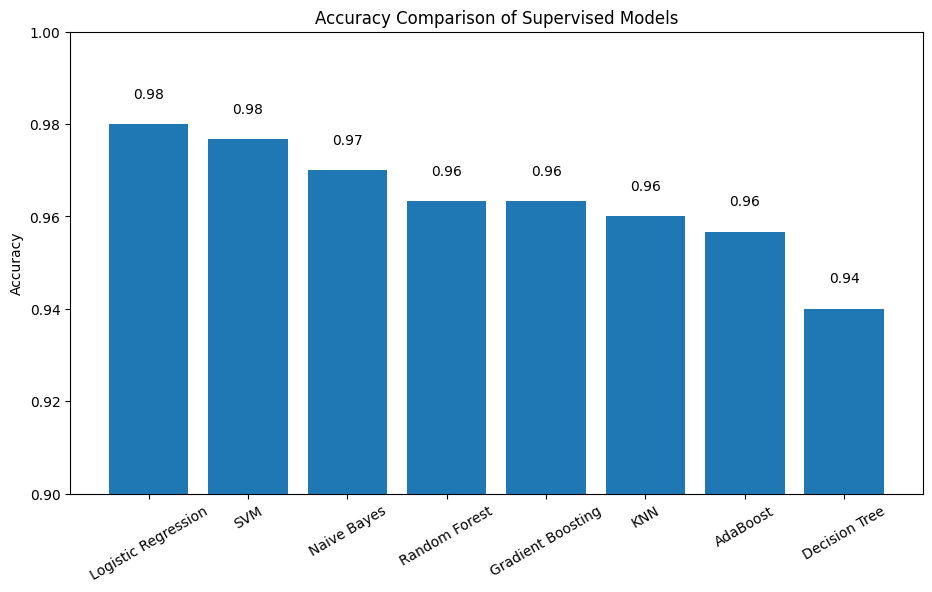

In [ ]:
plt.figure(figsize=(11,6))
bars = plt.bar(accuracy_df.index, accuracy_df['Accuracy'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005,
             f"{yval:.2f}", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Supervised Models")
plt.xticks(rotation=30)
plt.ylim(0.9, 1.0)
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score

cv_results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "KNN"]:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5)

    cv_results[name] = scores.mean()

pd.DataFrame.from_dict(cv_results, orient='index', columns=['CV Accuracy']) \
  .sort_values(by='CV Accuracy', ascending=False)


,CV Accuracy
Logistic Regression,0.982857
AdaBoost,0.980000
SVM,0.975714
Random Forest,0.974286
Gradient Boosting,0.971429
Naive Bayes,0.957143
Decision Tree,0.952857
KNN,0.947143


In [ ]:
for name, y_pred in predictions.items():
    print(f"\n{name} Model - Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


Decision Tree Model - Confusion Matrix:
[[196   9]
 [  9  86]]

Random Forest Model - Confusion Matrix:
[[203   2]
 [  9  86]]

Gradient Boosting Model - Confusion Matrix:
[[203   2]
 [  9  86]]

Logistic Regression Model - Confusion Matrix:
[[205   0]
 [  6  89]]

SVM Model - Confusion Matrix:
[[205   0]
 [  7  88]]

KNN Model - Confusion Matrix:
[[203   2]
 [ 10  85]]

Naive Bayes Model - Confusion Matrix:
[[197   8]
 [  1  94]]

AdaBoost Model - Confusion Matrix:
[[200   5]
 [  8  87]]


In [ ]:
for name, y_pred in predictions.items():
    print(f"\n{name} Model - Classification Report:")
    report = classification_report(y_test, y_pred, target_names=['Normal', 'Suspicious'])
    print(report)


Decision Tree Model - Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96       205
  Suspicious       0.91      0.91      0.91        95

    accuracy                           0.94       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300


Random Forest Model - Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.99      0.97       205
  Suspicious       0.98      0.91      0.94        95

    accuracy                           0.96       300
   macro avg       0.97      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300


Gradient Boosting Model - Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.99      0.97       205
  Suspicious       0.98      0.91      0.94        95

    accuracy                           0

In [ ]:
for name, y_pred in predictions.items():
    print(f"\n{name} Model - Additional Metrics:")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")



Decision Tree Model - Additional Metrics:
Precision: 0.9053
Recall: 0.9053
F1-Score: 0.9053
ROC-AUC: 0.9307

Random Forest Model - Additional Metrics:
Precision: 0.9773
Recall: 0.9053
F1-Score: 0.9399
ROC-AUC: 0.9478

Gradient Boosting Model - Additional Metrics:
Precision: 0.9773
Recall: 0.9053
F1-Score: 0.9399
ROC-AUC: 0.9478

Logistic Regression Model - Additional Metrics:
Precision: 1.0000
Recall: 0.9368
F1-Score: 0.9674
ROC-AUC: 0.9684

SVM Model - Additional Metrics:
Precision: 1.0000
Recall: 0.9263
F1-Score: 0.9617
ROC-AUC: 0.9632

KNN Model - Additional Metrics:
Precision: 0.9770
Recall: 0.8947
F1-Score: 0.9341
ROC-AUC: 0.9425

Naive Bayes Model - Additional Metrics:
Precision: 0.9216
Recall: 0.9895
F1-Score: 0.9543
ROC-AUC: 0.9752

AdaBoost Model - Additional Metrics:
Precision: 0.9457
Recall: 0.9158
F1-Score: 0.9305
ROC-AUC: 0.9457
